In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Task 1  Loading and Understanding the Dataset

In [3]:
state_txn_users = pd.read_excel('phonepe-pulse_raw-data.xlsx', sheet_name='State_Txn and Users')
state_txn_split = pd.read_excel('phonepe-pulse_raw-data.xlsx', sheet_name='State_TxnSplit')
state_device_data = pd.read_excel('phonepe-pulse_raw-data.xlsx', sheet_name='State_DeviceData')
district_txn_users = pd.read_excel('phonepe-pulse_raw-data.xlsx', sheet_name='District_Txn and Users')
district_demographics = pd.read_excel('phonepe-pulse_raw-data.xlsx', sheet_name='District Demographics')

##  1.1  Load each dataset and display its structure

In [4]:
# 1. State_Txn and Users - first 5 rows
state_txn_users.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [5]:
# 2. State_TxnSplit - bottom 10 rows
state_txn_split.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [6]:
# 3. State_DeviceData - 10 middle rows
middle_index = len(state_device_data) // 2
display(state_device_data.iloc[middle_index-5:middle_index+5])

,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


In [7]:
#4. District_Txn and Users - first 10 and last 10 rows
display(district_txn_users.head(10))
display(district_txn_users.tail(10))

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,1.999694e+10,2324.616616,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,1.122758e+10,2032.445525,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,3.041482e+10,1762.331031,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8.731263e+09,1784.157359,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,1.339853e+10,2011.243709,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5.564221e+09,2469.272118,392388,8184990


In [8]:
#5.district_demographics- display every 10th row 
district_demographics.iloc[::10]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


## 1.2 Display Basic Statistics and Data types of for each dataset 

In [10]:
# state_txn_users
display(state_txn_users.describe())
display(state_txn_users.dtypes)

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504.000000,504.000000,5.040000e+02,5.030000e+02,504.000000,5.040000e+02,5.040000e+02
mean,2019.285714,2.357143,4.074000e+07,7.083332e+10,1993.471543,4.777501e+06,9.774471e+07
std,1.031181,1.109971,8.228714e+07,1.440902e+11,607.464894,6.644496e+06,2.042376e+08
min,2018.000000,1.000000,7.780000e+02,1.928611e+06,0.000000,5.010000e+02,0.000000e+00
25%,2018.000000,1.000000,5.925578e+05,1.167157e+09,1598.910667,1.574202e+05,0.000000e+00
50%,2019.000000,2.000000,6.217487e+06,1.051605e+10,1861.380589,1.747914e+06,2.930574e+06
75%,2020.000000,3.000000,4.363675e+07,6.947045e+10,2259.087924,7.320945e+06,8.615022e+07
max,2021.000000,4.000000,5.736165e+08,1.027958e+12,3938.733850,3.966470e+07,1.208084e+09


State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [11]:
# state_txn_split
display(state_txn_split.describe())
display(state_txn_split.dtypes)

,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514.000000,2514.000000,2.514000e+03,2.514000e+03,2514.000000
mean,2019.286794,2.358393,8.167446e+06,1.443978e+10,1349.927929
std,1.030807,1.109251,2.423645e+07,5.995054e+10,1534.866221
min,2018.000000,1.000000,2.000000e+00,3.439721e+01,17.198606
25%,2018.000000,1.000000,2.788075e+04,1.762412e+07,385.735827
50%,2019.000000,2.000000,2.687980e+05,1.901189e+08,720.940406
75%,2020.000000,3.000000,3.683230e+06,2.661248e+09,1352.790116
max,2021.000000,4.000000,2.795990e+08,8.721520e+11,7767.539936


State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

In [12]:
# state_device_data
display(state_device_data.describe())
display(state_device_data.dtypes)

,Year,Quarter,Registered Users,Percentage
count,5544.000000,5544.000000,5.544000e+03,5544.000000
mean,2019.285714,2.357143,4.343183e+05,0.090909
std,1.030250,1.108970,9.056069e+05,0.083095
min,2018.000000,1.000000,1.000000e+01,0.006373
25%,2018.000000,1.000000,8.055750e+03,0.021588
50%,2019.000000,2.000000,7.442250e+04,0.056914
75%,2020.000000,3.000000,3.978875e+05,0.143626
max,2021.000000,4.000000,9.764252e+06,0.478367


State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

In [13]:
# district_txn_users
display(district_txn_users.describe())
display(district_txn_users.dtypes)

,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248.000000,10248.000000,1.024800e+04,1.024800e+04,10244.000000,1.024800e+04,1.024800e+04
mean,2019.285714,2.357143,2.003607e+06,3.542311e+09,1909.796545,2.349591e+05,4.807117e+06
std,1.030208,1.108924,9.613466e+06,1.473154e+10,600.943349,4.605978e+05,1.562541e+07
min,2018.000000,1.000000,0.000000e+00,0.000000e+00,84.944283,2.200000e+01,0.000000e+00
25%,2018.000000,1.000000,1.031418e+05,1.756668e+08,1554.589051,3.619550e+04,0.000000e+00
50%,2019.000000,2.000000,3.763065e+05,6.784562e+08,1863.135530,1.067640e+05,6.403025e+05
75%,2020.000000,3.000000,1.272815e+06,2.377256e+09,2203.083552,2.573165e+05,4.346320e+06
max,2021.000000,4.000000,3.487128e+08,4.444224e+11,11209.980550,1.060461e+07,5.544197e+08


State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

In [14]:
# district_demographics
display(district_demographics.describe())
display(district_demographics.dtypes)

,Population,Area (sq km),Density
count,7.420000e+02,742.000000,742.000000
mean,1.668555e+06,4395.373120,838.512129
std,1.458849e+06,4254.676124,2754.406896
min,0.000000e+00,0.000000,0.000000
25%,6.530815e+05,2039.750000,198.000000
50%,1.322359e+06,3402.500000,353.000000
75%,2.297440e+06,5432.750000,686.250000
max,1.008285e+07,45652.000000,36155.000000


State              object
District           object
Headquarters       object
Population          int64
Area (sq km)      float64
Density             int64
Code               object
Alternate Name     object
dtype: object

## 1.3 Check for missing values 

In [24]:
#state_txn_users 
missing_counts = state_txn_users.isnull().sum()
missing_percent = (missing_counts / len(state_txn_users)) * 100
missing_state_txn_users  = pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percentage (%)": missing_percent
    })
display(missing_state_txn_users)

if missing_percent.max() > 0:
    print("Column with highest missing %:", missing_percent.idxmax())
else:
    print("No missing values found.")


,Missing Count,Missing Percentage (%)
State,0,0.000000
Year,0,0.000000
Quarter,0,0.000000
Transactions,0,0.000000
Amount (INR),1,0.198413
ATV (INR),0,0.000000
Registered Users,0,0.000000
App Opens,0,0.000000


Column with highest missing %: Amount (INR)


In [25]:
# state_txn_split
missing_counts = state_txn_split.isnull().sum()
missing_percent = (missing_counts / len(state_txn_split)) * 100
missing_state_txn_split  = pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percentage (%)": missing_percent
    })
display(missing_state_txn_split)
if missing_percent.max() > 0:
    print("Column with highest missing %:", missing_percent.idxmax())
else:
    print("No missing values found.")


,Missing Count,Missing Percentage (%)
State,0,0.0
Year,0,0.0
Quarter,0,0.0
Transaction Type,0,0.0
Transactions,0,0.0
Amount (INR),0,0.0
ATV (INR),0,0.0


No missing values found.


In [26]:
# state_device_data
missing_counts = state_device_data.isnull().sum()
missing_percent = (missing_counts / len(state_device_data)) * 100
missing_state_device_data  = pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percentage (%)": missing_percent
    })
display(missing_state_device_data)

if missing_percent.max() > 0:
    print("Column with highest missing %:", missing_percent.idxmax())
else:
    print("No missing values found.")

,Missing Count,Missing Percentage (%)
State,0,0.0
Year,0,0.0
Quarter,0,0.0
Brand,0,0.0
Registered Users,0,0.0
Percentage,0,0.0


No missing values found.


In [27]:
# district_txn_users 
missing_counts = district_txn_users.isnull().sum()
missing_percent = (missing_counts / len(district_txn_users)) * 100
missing_district_txn_users  = pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percentage (%)": missing_percent
    })
display(missing_district_txn_users)
if missing_percent.max() > 0:
    print("Column with highest missing %:", missing_percent.idxmax())
else:
    print("No missing values found.")


,Missing Count,Missing Percentage (%)
State,0,0.000000
Year,0,0.000000
Quarter,0,0.000000
District,0,0.000000
Code,28,0.273224
Transactions,0,0.000000
Amount (INR),0,0.000000
ATV (INR),4,0.039032
Registered Users,0,0.000000
App Opens,0,0.000000


Column with highest missing %: Code


In [28]:
# district_demographics
missing_counts = district_demographics.isnull().sum()
missing_percent = (missing_counts / len(district_demographics)) * 100
missing_district_demographics  = pd.DataFrame({
        "Missing Count": missing_counts,
        "Missing Percentage (%)": missing_percent
    })
display(missing_district_demographics)
if missing_percent.max() > 0:
    print("Column with highest missing %:", missing_percent.idxmax())
else:
    print("No missing values found.")


,Missing Count,Missing Percentage (%)
State,0,0.0
District,0,0.0
Headquarters,0,0.0
Population,0,0.0
Area (sq km),0,0.0
Density,0,0.0
Code,0,0.0
Alternate Name,0,0.0


No missing values found.


##  1.4 Create a Summary 

### 1.4.1 Calculate the total number of states and total number of districts 

In [29]:
# Total number of states
total_states = state_txn_users["State"].nunique()
total_states

36

In [30]:
# Total number of districts
total_districts = district_txn_users["District"].nunique()
total_districts 

723

In [31]:
print("Total number of States:", total_states)
print("Total number of Districts:", total_districts)


Total number of States: 36
Total number of Districts: 723


### 1.4.2 Identify the state with the highest number of districts 

In [32]:
# State with highest number of districts
state_district_counts = district_txn_users["State"].value_counts()
state_with_max_districts = state_district_counts.idxmax()

print("State with highest number of districts:", state_with_max_districts)
print("Number of districts in that state:", state_district_counts.max())

State with highest number of districts: Uttar Pradesh
Number of districts in that state: 1050


# Task 2 :- EDA

##  2.1 Analyse Transactions Trends Over the Year for each state

In [34]:
# 2.1 Transaction Trends
state_trends = state_txn_users.groupby("State").agg({
    "Transactions": "sum",
    "Amount (INR)": "sum"
}).reset_index()

print("Total Transactions & Amount per State:")
display(state_trends)

Total Transactions & Amount per State:


,State,Transactions,Amount (INR)
0,Andaman & Nicobar Islands,1223565,3.641818e+09
1,Andhra Pradesh,1781091169,3.187847e+12
2,Arunachal Pradesh,8043799,2.225183e+10
3,Assam,123577981,2.814087e+11
4,Bihar,713643889,1.639579e+12
5,Chandigarh,25516542,5.371208e+10
6,Chhattisgarh,241908549,4.156353e+11
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10
8,Delhi,1011031124,1.649942e+12
9,Goa,24481604,4.427187e+10


In [36]:
# Top 5 and Bottom 5 states by transaction volume
top5_states = state_trends.sort_values(by="Transactions", ascending=False).head(5)
bottom5_states = state_trends.sort_values(by="Transactions", ascending=True).head(5)

print("Top 5 States by Transaction Volume:")
display(top5_states)
print()
print("Bottom 5 States by Transaction Volume:")
display(bottom5_states)


Top 5 States by Transaction Volume:


,State,Transactions,Amount (INR)
15,Karnataka,2981044533,4.361396e+12
20,Maharashtra,2833670154,4.290995e+12
31,Telangana,2347430243,4.574246e+12
1,Andhra Pradesh,1781091169,3.187847e+12
28,Rajasthan,1382918930,2.625584e+12



Bottom 5 States by Transaction Volume:


,State,Transactions,Amount (INR)
18,Lakshadweep,71610,1.921587e+08
0,Andaman & Nicobar Islands,1223565,3.641818e+09
17,Ladakh,1880109,6.606978e+09
23,Mizoram,2162776,6.317141e+09
22,Meghalaya,5648913,1.254162e+10


##  2.2 Most Common Transaction Type per State & Quarter

In [38]:
txn_type_freq = state_txn_split.loc[
    state_txn_split.groupby(["State", "Year", "Quarter"])["Transactions"].idxmax()
].reset_index(drop=True)

print("Most Frequent Transaction Type per State & Quarter:")
display(txn_type_freq)


Most Frequent Transaction Type per State & Quarter:


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1.845307e+06,439.358921
1,Andaman & Nicobar Islands,2018,2,Recharge & bill payments,6735,2.320945e+06,344.609463
2,Andaman & Nicobar Islands,2018,3,Recharge & bill payments,8636,4.343505e+06,502.953320
3,Andaman & Nicobar Islands,2018,4,Recharge & bill payments,11517,5.450550e+06,473.261224
4,Andaman & Nicobar Islands,2019,1,Recharge & bill payments,15263,6.611460e+06,433.169093
...,...,...,...,...,...,...,...
499,West Bengal,2020,2,Peer-to-peer payments,24855687,8.498400e+10,3419.096979
500,West Bengal,2020,3,Peer-to-peer payments,37556349,1.331207e+11,3544.558502
501,West Bengal,2020,4,Peer-to-peer payments,46437233,1.663919e+11,3583.156529
502,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226


## 2.3 Device Brand with Highest Users per State

In [41]:
top_device_brand = state_device_data.loc[
    state_device_data.groupby("State")["Registered Users"].idxmax()
].reset_index(drop=True)

print("Top Device Brand per State:")
display(top_device_brand)


Top Device Brand per State:


,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2021,2,Vivo,15056,0.242467
1,Andhra Pradesh,2021,2,Xiaomi,4937684,0.251654
2,Arunachal Pradesh,2021,2,Vivo,63439,0.234463
3,Assam,2021,2,Xiaomi,909274,0.251385
4,Bihar,2021,2,Xiaomi,4268361,0.285087
5,Chandigarh,2021,2,Xiaomi,101761,0.226855
6,Chhattisgarh,2021,2,Vivo,1169224,0.241722
7,Dadra & Nagar Haveli and Daman & Diu,2021,2,Vivo,87001,0.252181
8,Delhi,2021,2,Xiaomi,2731995,0.244306
9,Goa,2021,2,Xiaomi,152107,0.249722


## 2.4 Top District per State based on Population

In [45]:
top_district_population = district_demographics.loc[
    district_demographics.groupby("State")["Population"].idxmax()
].reset_index(drop=True)

print("Top District per State by Population:")
display(top_district_population)

Top District per State by Population:


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andaman & Nicobar Islands,South Andaman,Port Blair,238142,2672.00,89,AN03,South Andaman
1,Andhra Pradesh,East Godavari,Kakinada,5151549,10807.00,477,AP03,East Godavari
2,Arunachal Pradesh,Papum Pare,Yupia,176385,2875.00,61,AR16,Papum Pare
3,Assam,Nagaon,Nagaon,2826006,3831.00,738,AS27,Nagaon
4,Bihar,Patna,Patna,5772804,3202.00,1803,BR26,Patna
5,Chandigarh,Chandigarh,Chandigarh,1055450,114.00,9258,CH01,Chandigarh
6,Chhattisgarh,Raipur,Raipur,2160876,2892.00,750,CG24,Raipur
7,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,Silvassa,343709,491.00,700,DD01,Dadra and Nagar Haveli
8,Delhi,North West Delhi,Kanjhawala,3656539,130.00,8254,DL06,North West
9,Goa,North Goa,Panaji,817761,1736.00,471,GA01,North Goa


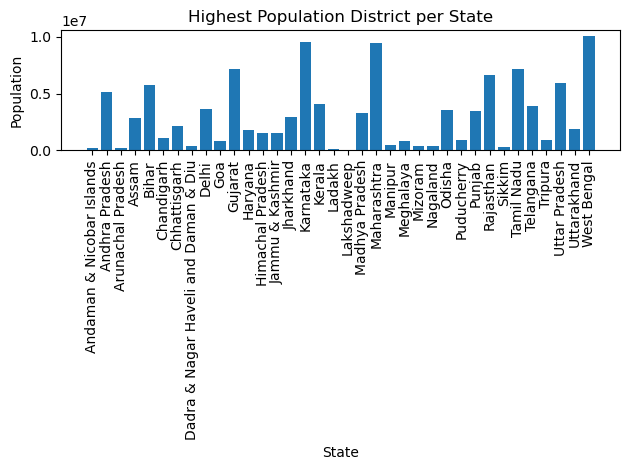

In [44]:
# Create column chart (single plot, no specific colors)
plt.figure()
plt.bar(top_district_population["State"], top_district_population["Population"])
plt.xticks(rotation=90)
plt.title("Highest Population District per State")
plt.xlabel("State")
plt.ylabel("Population")
plt.tight_layout()
plt.show()

## 2.5 Average Transaction Value (ATV) per State

In [46]:
state_atv = state_txn_users.groupby("State").agg({
    "Amount (INR)": "sum",
    "Transactions": "sum"
}).reset_index()

state_atv["Computed_ATV"] = state_atv["Amount (INR)"] / state_atv["Transactions"]

print("Average Transaction Value (ATV) per State:")
display(state_atv[["State", "Computed_ATV"]])

# Top 5 and Bottom 5 by ATV
top5_atv = state_atv.sort_values("Computed_ATV", ascending=False).head(5)
bottom5_atv = state_atv.sort_values("Computed_ATV", ascending=True).head(5)

print("Top 5 States by Highest ATV:")
display(top5_atv[["State", "Computed_ATV"]])

print("Bottom 5 States by Lowest ATV:")
display(bottom5_atv[["State", "Computed_ATV"]])


Average Transaction Value (ATV) per State:


,State,Computed_ATV
0,Andaman & Nicobar Islands,2976.399178
1,Andhra Pradesh,1789.828350
2,Arunachal Pradesh,2766.333539
3,Assam,2277.175192
4,Bihar,2297.474906
5,Chandigarh,2104.990740
6,Chhattisgarh,1718.150602
7,Dadra & Nagar Haveli and Daman & Diu,1497.232192
8,Delhi,1631.940078
9,Goa,1808.372977


Top 5 States by Highest ATV:


,State,Computed_ATV
17,Ladakh,3514.146494
0,Andaman & Nicobar Islands,2976.399178
23,Mizoram,2920.848685
21,Manipur,2905.757931
24,Nagaland,2794.140997


Bottom 5 States by Lowest ATV:


,State,Computed_ATV
15,Karnataka,1463.042846
7,Dadra & Nagar Haveli and Daman & Diu,1497.232192
20,Maharashtra,1514.288897
35,West Bengal,1541.683482
8,Delhi,1631.940078


## 2.6 App Usage Trends

In [49]:
app_usage = state_txn_users.groupby(["State", "Year", "Quarter"])["App Opens"].sum().reset_index()

print("Total App Opens per State-Year-Quarter:")
display(app_usage)

Total App Opens per State-Year-Quarter:


,State,Year,Quarter,App Opens
0,Andaman & Nicobar Islands,2018,1,0
1,Andaman & Nicobar Islands,2018,2,0
2,Andaman & Nicobar Islands,2018,3,0
3,Andaman & Nicobar Islands,2018,4,0
4,Andaman & Nicobar Islands,2019,1,0
...,...,...,...,...
499,West Bengal,2020,2,198589332
500,West Bengal,2020,3,246554831
501,West Bengal,2020,4,291721919
502,West Bengal,2021,1,316832674


/var/folders/kr/9v50g3yd5zb_f0q99wrxsxl80000gn/T/ipykernel_1578/412392102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_usage["Time"] = state_usage["Year"].astype(str) + "-Q" + state_usage["Quarter"].astype(str)


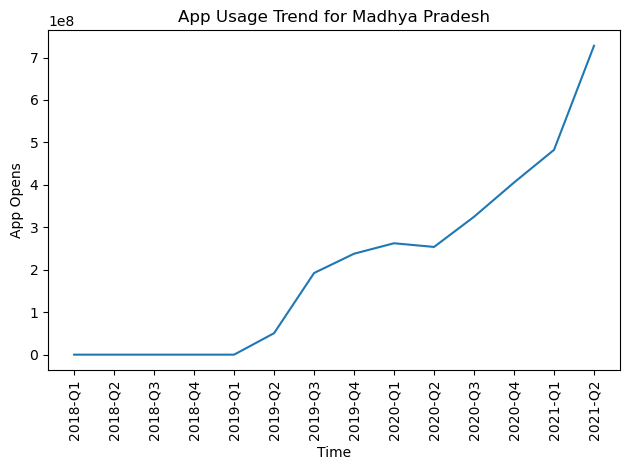

In [51]:
# Line plot for a selected state (example: Maharashtra)
selected_state = "Madhya Pradesh"
state_usage = app_usage[app_usage["State"] == selected_state]
state_usage["Time"] = state_usage["Year"].astype(str) + "-Q" + state_usage["Quarter"].astype(str)

plt.figure()
plt.plot(state_usage["Time"], state_usage["App Opens"])
plt.xticks(rotation=90)
plt.title(f"App Usage Trend for {selected_state}")
plt.xlabel("Time")
plt.ylabel("App Opens")
plt.tight_layout()
plt.show()

## 2.7 Distribution of Transaction Types (Most Recent Quarter)

In [52]:
latest_year = state_txn_split["Year"].max()
latest_quarter = state_txn_split[state_txn_split["Year"] == latest_year]["Quarter"].max()

recent_data = state_txn_split[
    (state_txn_split["Year"] == latest_year) & 
    (state_txn_split["Quarter"] == latest_quarter)
]

txn_distribution = recent_data.groupby("Transaction Type")["Transactions"].sum().reset_index()
txn_distribution 

,Transaction Type,Transactions
0,Financial Services,3397356
1,Merchant payments,1499624295
2,Others,9061701
3,Peer-to-peer payments,1744265068
4,Recharge & bill payments,685022045


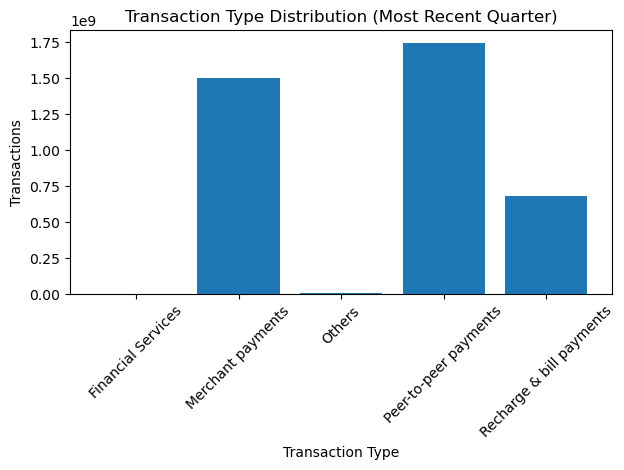

In [53]:
plt.figure()
plt.bar(txn_distribution["Transaction Type"], txn_distribution["Transactions"])
plt.xticks(rotation=45)
plt.title("Transaction Type Distribution (Most Recent Quarter)")
plt.xlabel("Transaction Type")
plt.ylabel("Transactions")
plt.tight_layout()
plt.show()

## 2.8 Unique Mapping Between District Name and Code

In [55]:
district_mapping = district_txn_users[["District", "Code"]].drop_duplicates()

print("Unique District Name and Code Mapping:")
display(district_mapping.head())

# Export CSV
csv_path = "district_name_code_mapping.csv"
district_mapping.to_csv(csv_path, index=False)

print(f"CSV file exported successfully at: {csv_path}")

Unique District Name and Code Mapping:


,District,Code
0,Nicobars,AN01
1,North And Middle Andaman,AN02
2,South Andaman,AN03
42,Anantapur,AP01
43,Chittoor,AP02


CSV file exported successfully at: district_name_code_mapping.csv


# Task 3 Data Quality Checks 

## 3.1 Ensure Data Consistency Across State and District Levels

In [56]:
district_agg = district_txn_users.groupby("State").agg({
    "Transactions": "sum",
    "Amount (INR)": "sum",
    "Registered Users": "sum"
}).reset_index()

state_agg = state_txn_users.groupby("State").agg({
    "Transactions": "sum",
    "Amount (INR)": "sum",
    "Registered Users": "sum"
}).reset_index()

display(district_agg)
display(state_agg)

,State,Transactions,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.860292e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320


,State,Transactions,Amount (INR),Registered Users
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396
1,Andhra Pradesh,1781091169,3.187847e+12,158007957
2,Arunachal Pradesh,8043799,2.225183e+10,1862214
3,Assam,123577981,2.814087e+11,26860751
4,Bihar,713643889,1.639579e+12,115284760
5,Chandigarh,25516542,5.371208e+10,3801466
6,Chhattisgarh,241908549,4.156353e+11,37448388
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112
8,Delhi,1011031124,1.649942e+12,95374654
9,Goa,24481604,4.427187e+10,4755320


In [57]:
comparison = pd.merge(state_agg, district_agg, on="State", suffixes=("_State", "_District"))
comparison["Txn_Diff"] = comparison["Transactions_State"] - comparison["Transactions_District"]
comparison["Amount_Diff"] = comparison["Amount (INR)_State"] - comparison["Amount (INR)_District"]
comparison["Users_Diff"] = comparison["Registered Users_State"] - comparison["Registered Users_District"]

print("Discrepancies between State & District aggregation:")
display(comparison)


Discrepancies between State & District aggregation:


,State,Transactions_State,Amount (INR)_State,Registered Users_State,Transactions_District,Amount (INR)_District,Registered Users_District,Txn_Diff,Amount_Diff,Users_Diff
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396,0,-4.768372e-07,0
1,Andhra Pradesh,1781091169,3.187847e+12,158007957,1781091169,3.860292e+12,158007957,0,-6.724447e+11,0
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214,0,1.525879e-05,0
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751,0,-6.103516e-05,0
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760,0,-9.765625e-04,0
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466,0,-3.814697e-05,0
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388,0,6.713867e-04,0
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112,0,-1.144409e-05,0
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654,0,-4.882812e-04,0
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320,0,7.629395e-06,0


# Task 4 Data Merging and Advanced Analysis

## 4.1 Ration of Users to Population by State

In [58]:
state_population = district_demographics.groupby("State")["Population"].sum().reset_index()
state_users = state_txn_users.groupby("State")["Registered Users"].sum().reset_index()

user_pop_ratio = pd.merge(state_users, state_population, on="State")
user_pop_ratio["User_Pop_Ratio"] = user_pop_ratio["Registered Users"] / user_pop_ratio["Population"]

print("User to Population Ratio per State:")
display(user_pop_ratio.head())

User to Population Ratio per State:


,State,Registered Users,Population,User_Pop_Ratio
0,Andaman & Nicobar Islands,408396,380581,1.073086
1,Andhra Pradesh,158007957,49378776,3.199916
2,Arunachal Pradesh,1862214,1606047,1.159502
3,Assam,26860751,34461385,0.779445
4,Bihar,115284760,103817951,1.110451


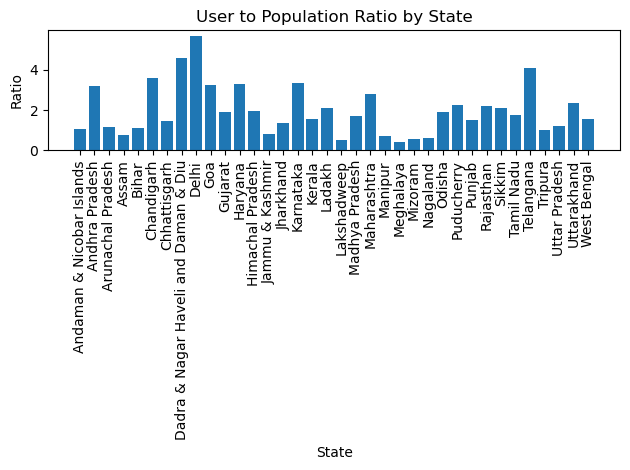

In [59]:
plt.figure()
plt.bar(user_pop_ratio["State"], user_pop_ratio["User_Pop_Ratio"])
plt.xticks(rotation=90)
plt.title("User to Population Ratio by State")
plt.xlabel("State")
plt.ylabel("Ratio")
plt.tight_layout()
plt.show()

## 4.2 Correlation Density vs Transactions

Correlation between Population Density and Transactions: 0.3077041087559288


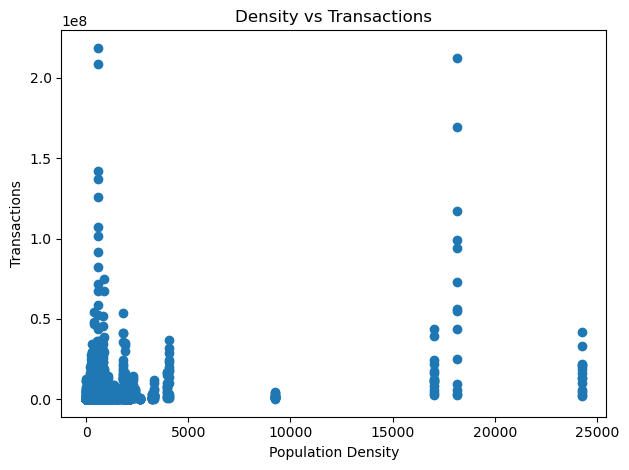

In [60]:
district_merge = pd.merge(district_txn_users, district_demographics, on=["State","District","Code"])
corr_value = district_merge["Density"].corr(district_merge["Transactions"])

print("Correlation between Population Density and Transactions:", corr_value)

plt.figure()
plt.scatter(district_merge["Density"], district_merge["Transactions"])
plt.title("Density vs Transactions")
plt.xlabel("Population Density")
plt.ylabel("Transactions")
plt.tight_layout()
plt.show()

## 4.3 Avg Transaction Amount per User

In [62]:
state_fin = state_txn_users.groupby("State").agg({
    "Amount (INR)": "sum",
    "Registered Users": "sum"
}).reset_index()

state_fin["Avg_Amount_per_User"] = state_fin["Amount (INR)"] / state_fin["Registered Users"]

print("Average Transaction Amount per User:")
display(state_fin.head())
print()

top5_avg = state_fin.sort_values("Avg_Amount_per_User", ascending=False).head(5)
bottom5_avg = state_fin.sort_values("Avg_Amount_per_User").head(5)
print()

print("Top 5 States by Avg Amount per User:")
display(top5_avg)
print()

print("Bottom 5 States by Avg Amount per User:")
display(bottom5_avg)

Average Transaction Amount per User:


,State,Amount (INR),Registered Users,Avg_Amount_per_User
0,Andaman & Nicobar Islands,3.641818e+09,408396,8917.369075
1,Andhra Pradesh,3.187847e+12,158007957,20175.233763
2,Arunachal Pradesh,2.225183e+10,1862214,11949.126662
3,Assam,2.814087e+11,26860751,10476.576498
4,Bihar,1.639579e+12,115284760,14221.991933




Top 5 States by Avg Amount per User:


,State,Amount (INR),Registered Users,Avg_Amount_per_User
31,Telangana,4.574246e+12,149224214,30653.509622
15,Karnataka,4.361396e+12,203098564,21474.282206
1,Andhra Pradesh,3.187847e+12,158007957,20175.233763
28,Rajasthan,2.625584e+12,149770064,17530.768707
8,Delhi,1.649942e+12,95374654,17299.587909



Bottom 5 States by Avg Amount per User:


,State,Amount (INR),Registered Users,Avg_Amount_per_User
18,Lakshadweep,1.921587e+08,34223,5614.898889
32,Tripura,2.097051e+10,3661575,5727.184275
7,Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
16,Kerala,3.729599e+11,51267042,7274.846690
12,Himachal Pradesh,9.786546e+10,13373980,7317.601442


##  4.4 Device Brand Usage Ratio

In [63]:
total_users_state = state_txn_users.groupby("State")["Registered Users"].sum().reset_index()
device_merge = pd.merge(state_device_data, total_users_state, on="State", suffixes=("_Brand","_Total"))
device_merge["Brand_Usage_Ratio"] = device_merge["Registered Users_Brand"] / device_merge["Registered Users_Total"]

print("Device Brand Usage Ratio:")
display(device_merge.head())

Device Brand Usage Ratio:


,State,Year,Quarter,Brand,Registered Users_Brand,Percentage,Registered Users_Total,Brand_Usage_Ratio
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0.247033,408396,0.004077
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0.214392,408396,0.003538
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0.145697,408396,0.002405
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0.074332,408396,0.001227
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0.049258,408396,0.000813


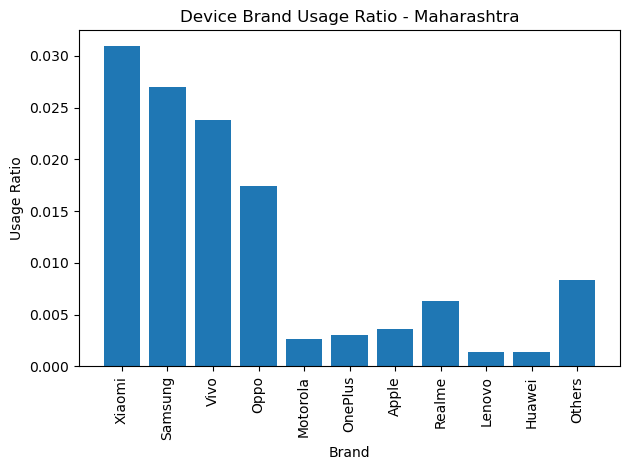

In [64]:
# Bar plot for one example state (Maharashtra)
example_state = "Maharashtra"
example_data = device_merge[device_merge["State"] == example_state]

plt.figure()
plt.bar(example_data["Brand"], example_data["Brand_Usage_Ratio"])
plt.xticks(rotation=90)
plt.title("Device Brand Usage Ratio - Maharashtra")
plt.xlabel("Brand")
plt.ylabel("Usage Ratio")
plt.tight_layout()
plt.show()


## 5.1 Line Plot Transactions & Amount

In [65]:
selected_state = "Maharashtra"
state_time = state_txn_users[state_txn_users["State"] == selected_state]
state_time["Time"] = state_time["Year"].astype(str) + "-Q" + state_time["Quarter"].astype(str)

/var/folders/kr/9v50g3yd5zb_f0q99wrxsxl80000gn/T/ipykernel_1578/3830428022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_time["Time"] = state_time["Year"].astype(str) + "-Q" + state_time["Quarter"].astype(str)


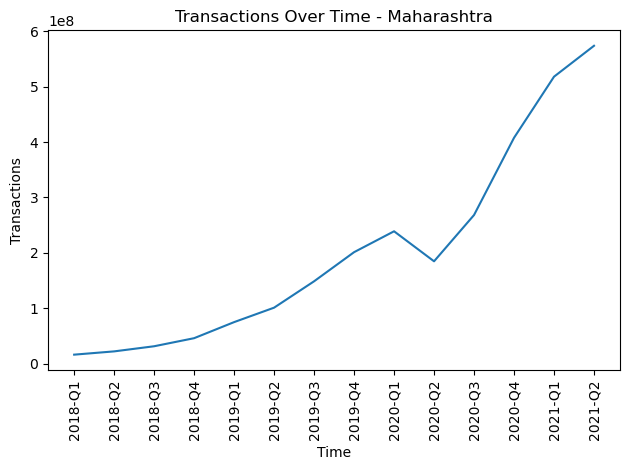

In [66]:
plt.figure()
plt.plot(state_time["Time"], state_time["Transactions"])
plt.xticks(rotation=90)
plt.title("Transactions Over Time - Maharashtra")
plt.xlabel("Time")
plt.ylabel("Transactions")
plt.tight_layout()
plt.show()

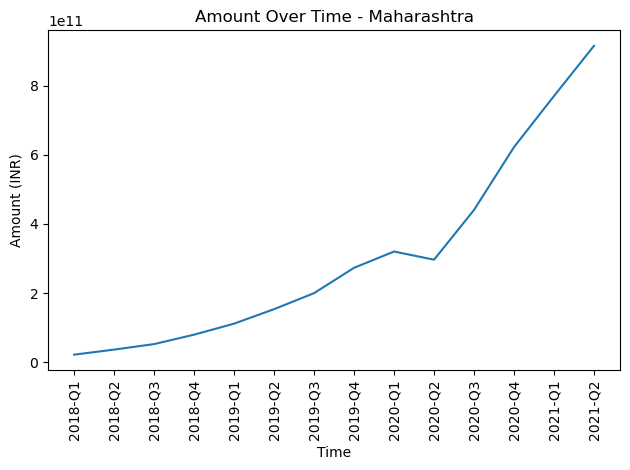

In [67]:
plt.figure()
plt.plot(state_time["Time"], state_time["Amount (INR)"])
plt.xticks(rotation=90)
plt.title("Amount Over Time - Maharashtra")
plt.xlabel("Time")
plt.ylabel("Amount (INR)")
plt.tight_layout()
plt.show()

## 5.2 Pie Chart Transaction Type (Latest Quarter)

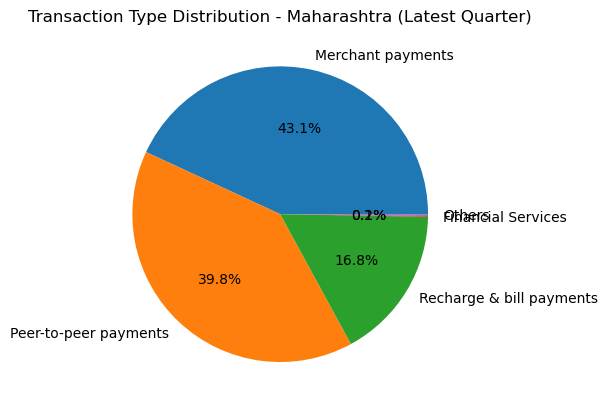

In [68]:
latest_year = state_txn_split["Year"].max()
latest_quarter = state_txn_split[state_txn_split["Year"] == latest_year]["Quarter"].max()

pie_data = state_txn_split[
    (state_txn_split["State"] == selected_state) &
    (state_txn_split["Year"] == latest_year) &
    (state_txn_split["Quarter"] == latest_quarter)
]

plt.figure()
plt.pie(pie_data["Transactions"], labels=pie_data["Transaction Type"], autopct="%1.1f%%")
plt.title("Transaction Type Distribution - Maharashtra (Latest Quarter)")
plt.show()

## 5.3 Population Density Visualization

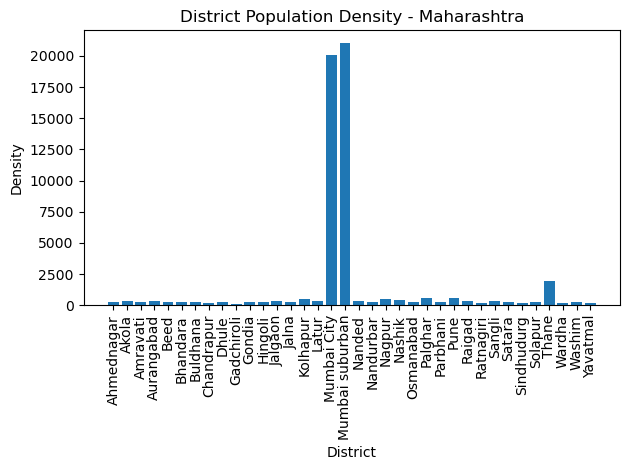

In [69]:
density_state = district_demographics[district_demographics["State"] == selected_state]

plt.figure()
plt.bar(density_state["District"], density_state["Density"])
plt.xticks(rotation=90)
plt.title("District Population Density - Maharashtra")
plt.xlabel("District")
plt.ylabel("Density")
plt.tight_layout()
plt.show()